In [77]:
#import relevant packages
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import panel as pn
import os
from pathlib import Path
from dotenv import load_dotenv
from datetime import date, datetime

pn.extension('plotly')

import hvplot.pandas

In [78]:
def getClimateDfPm10(year):
    #import climate data
    climate_df = pd.read_csv('data/climate_'+ str(year) +'.csv')
    #drop index column
    climate_df = climate_df.drop(climate_df.columns[0], axis = 1)
    #convert date column to datetime
    climate_df['Date'] = pd.to_datetime(climate_df['Date'])
    #set date to index
    climate_df = climate_df.set_index(['Date'])
    climate_df.head()
    #pull out only pm10 data
    pm_10 = climate_df[climate_df['Specie']=='co']
    return climate_df

In [79]:
climate_df_2019 = getClimateDfPm10(2019)
print(climate_df_2019['Specie'].unique())
air_quality_factors = climate_df_2019['Specie'].unique()
climate_df_2020 = getClimateDfPm10(2020)
climate_df_2020 = climate_df_2020[climate_df_2020['Specie'].isin(air_quality_factors)]
climate_df_2020['Specie'].unique()



['pm25' 'co' 'pm10' 'so2' 'no2' 'o3']


array(['no2', 'so2', 'pm25', 'o3', 'co', 'pm10'], dtype=object)

In [80]:
#most poplated cities per country
india_cities = ['Mumbai', 'Delhi', 'Bengaluru', 'Kolkata', 'Chennai']
china_cities = ['Shanghai', 'Beijing', 'Tianjin','Guangzhou','Shenzen']
uk_cities = ['London', 'Manchester','Birmingham','Leeds', 'Glasgow']
usa_cities = ['New York', "Los Angles", 'Chicago','Houston','Phoenix']
aus_cities = ['Sydney', 'Melbourne', 'Brisbane', 'Perth', 'Adelaide']
japan_cities = ['Tokyo', 'Yokohama', 'Osaka', 'Nagoya', 'Sapporo']



#function to filter climate data by city
def filter_df(df,column, filter_list):
    return df[df[column].isin(filter_list)]


In [81]:
#create country dataframes containing 5 most populated cities

india_climate_2020 = filter_df(climate_df_2020,'City', india_cities)[['City','Specie','median']]
india_climate_2019 = filter_df(climate_df_2019,'City', india_cities)[['City','Specie','median']]

china_climate_2020 = filter_df(climate_df_2020,'City', china_cities)[['City','Specie','median']]
china_climate_2019 = filter_df(climate_df_2019,'City', china_cities)[['City','Specie','median']]

uk_climate_2020 = filter_df(climate_df_2020,'City', uk_cities)[['City','Specie','median']]
uk_climate_2019 = filter_df(climate_df_2019,'City', uk_cities)[['City','Specie','median']]

usa_climate_2020 = filter_df(climate_df_2020,'City', usa_cities)[['City','Specie','median']]
usa_climate_2019 = filter_df(climate_df_2019,'City', usa_cities)[['City','Specie','median']]

aus_climate_2020 = filter_df(climate_df_2020,'City', aus_cities)[['City','Specie','median']]
aus_climate_2019 = filter_df(climate_df_2019,'City', aus_cities)[['City','Specie','median']]

japan_climate_2020 = filter_df(climate_df_2020,'City', japan_cities)[['City','Specie','median']]
japan_climate_2019 = filter_df(climate_df_2019,'City', japan_cities)[['City','Specie','median']]

japan_climate_2019.groupby(['Date', 'Specie'])['median'].mean()

Date        Specie
2018-12-31  co         3.40
            no2        9.70
            o3        21.44
            pm10       5.60
            pm25      19.40
            so2        2.62
2019-01-01  co         3.84
            no2       10.96
            o3        19.38
            pm10       9.40
            pm25      34.60
            so2        2.34
2019-01-02  co         3.18
            no2        8.22
            o3        24.68
            pm10       6.00
            pm25      21.00
            so2        2.34
2019-01-03  co         3.18
            no2        8.78
            o3        24.84
            pm10       5.60
            pm25      18.60
            so2        2.90
2019-01-04  co         4.06
            no2       14.12
            o3        20.20
            pm10       7.80
            pm25      27.20
            so2        2.34
                      ...  
2019-10-02  co         3.18
            no2       13.38
            o3        26.08
            pm10      22.00
 

In [82]:
#poplation weights 
india_weights = [0.3021,
0.2601,
0.1215,
0.1102,
0.1030]

china_weights = [0.3353,
0.1761,
0.1666,
0.1664,
0.1556]

uk_weights = [0.5642,
0.1401,
0.1339,
0.0971,
0.0647]

usa_weights = [0.4363,
0.2105,
0.1412,
0.1227,
0.0893]

aus_weights = [0.3262,
0.2993,
0.1544,
0.1337,
0.0864]

jap_weights = [0.4487,
0.1924,
0.1395,
0.1180,
0.1014]

#zip together cities and weights
india_dict = dict(zip(india_cities,india_weights))
china_dict = dict(zip(china_cities,china_weights))
uk_dict = dict(zip(uk_cities,uk_weights))
usa_dict = dict(zip(usa_cities,usa_weights))
aus_dict = dict(zip(aus_cities,aus_weights))
japan_dict = dict(zip(japan_cities,jap_weights))


In [91]:
#function to weight median by population
def weight_climate(climate_df, weight_dict):
    climate_df['weight'] = climate_df['City'].map(weight_dict)
    climate_df['weighted_median'] = climate_df['weight'] * climate_df['median']
    return climate_df


In [92]:
india_climate_2020 = weight_climate(india_climate_2020, india_dict)
india_climate_2019 = weight_climate(india_climate_2019, india_dict)

china_climate_2020 = weight_climate(china_climate_2020, china_dict)
china_climate_2019 = weight_climate(china_climate_2019, china_dict)

uk_climate_2020 = weight_climate(uk_climate_2020, uk_dict)
uk_climate_2019 = weight_climate(uk_climate_2019, uk_dict)

usa_climate_2020 = weight_climate(usa_climate_2020, usa_dict)
usa_climate_2019 = weight_climate(usa_climate_2019, usa_dict)

aus_climate_2020 = weight_climate(aus_climate_2020, aus_dict)
aus_climate_2019 = weight_climate(aus_climate_2019, aus_dict)

japan_climate_2020 = weight_climate(japan_climate_2020, japan_dict)
japan_climate_2019 = weight_climate(japan_climate_2019, japan_dict)

<AxesSubplot:xlabel='Date'>

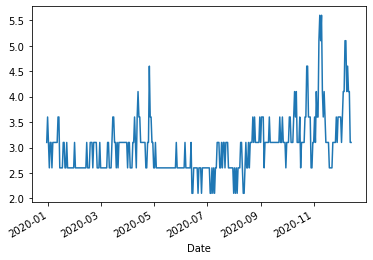

In [53]:
# #create dataframe for each country

# india = pm_10[pm_10['Country']=='IN']
# china = pm_10[pm_10['Country']=='CN']
# united_kingdom = pm_10[pm_10['Country']=='GB']
# unitied_states = pm_10[pm_10['Country']=='US']
# australia = pm_10[pm_10['Country']=='AU']
# japan = pm_10[pm_10['Country']=='JP']

# shenzen = china[china['City']=='Shenzhen']
# shenzen['median'].plot()

In [101]:
def getStockDf(year):
    start_date = int(datetime(year, 1, 1, 0, 0).timestamp())
    end_date = int(datetime(year+1, 1, 1, 0, 0).timestamp())
    # yahoo url template (daily data: 2020-07-24 to 2020-11-25)
    yahoo_url = 'https://query1.finance.yahoo.com/v7/finance/download/{tix}?period1={s}&period2={e}&interval=1d&events=history'
    # get data for 3 tickers and concatenate together
    tickers = ['^GSPC', '^BSESN','000001.SS', '^N225', '^FTSE', '^AXJO']
    df = pd.DataFrame()
    for ticker in tickers:
        url = yahoo_url.format(tix=ticker,s=start_date,e=end_date)
        df_tmp = pd.read_csv(url)
        df_tmp['Ticker'] = ticker
        df_tmp['StockPctChange'] = df_tmp['Adj Close'].pct_change()
        df = pd.concat([df, df_tmp])
    df.to_csv('data/stock_' + str(year) + '.csv')
    fig = px.line(df, x="Date", y="StockPctChange", color='Ticker')
    fig.show()
    return df

In [102]:
# Average PM10 India
# india_graph = india.groupby('Date')['median'].mean().hvplot(title = "PM 10",label = 'India')
# china_graph = china.groupby('Date')['median'].mean().hvplot(label = 'China')
# uk_graph = united_kingdom.groupby('Date')['median'].mean().hvplot(label = 'UK')
# us_graph = unitied_states.groupby('Date')['median'].mean().hvplot(label='US')
# au_graph = australia.groupby('Date')['median'].mean().hvplot(label='Australia')
# jp_graph = japan.groupby('Date')['median'].mean().hvplot(label='Japan')



In [103]:
# china.groupby('Date')['median'].mean().rolling(7).mean().hvplot()


In [104]:
def get_plot(chart):
 
     return chart

In [145]:
country_dict = {'IN' : '^BSESN',
                'CN' : '000001.SS',
                'JP' : '^N225',
                'AU' : '^AXJO',
                'GB' : '^FTSE',
                'US' : '^GSPC'}


def corr_graph_maker(df_stock, climate_df, country='IN', polutant='co'):
    polutant_df = climate_df[climate_df['Specie'] == polutant]
    
    polutant_df_country = polutant_df[polutant_df['Country']== country]['median'].groupby('Date').mean().pct_change()
    df_stock = df_stock[df_stock['Ticker'] == country_dict[country]].set_index('Date')

    df_stock.index = df_stock.index.astype('datetime64[ns]')
    df_stock_polutants = pd.DataFrame({'Date':polutant_df_country.index, 'PolutantPctChange':polutant_df_country.values})
    df_stock_polutants.set_index('Date', inplace=True)
    df_stock_polutants = df_stock_polutants[~df_stock_polutants.index.duplicated(keep='first')]   
    
    df_stock_concat = pd.concat([df_stock, df_stock_polutants], join='inner', axis=1)
    # df_stock_concat = df_stock_concat[['StockPctChange', 'PolutantPctChange']]

    corrSeries = df_stock_concat['StockPctChange'].rolling(20).corr(df_stock_concat['PolutantPctChange'].rolling(20))
    # return corrSeries
    corrDf = pd.DataFrame({'Date':corrSeries.index, 'PolutantPctChange':corrSeries.values})
    corrDf.columns = ['Date', 'Corr']
#     # print(corr)
    bx = px.scatter_matrix(corrDf , color='Corr')
    return bx


['pm25', 'co', 'pm10', 'so2', 'no2', 'o3']

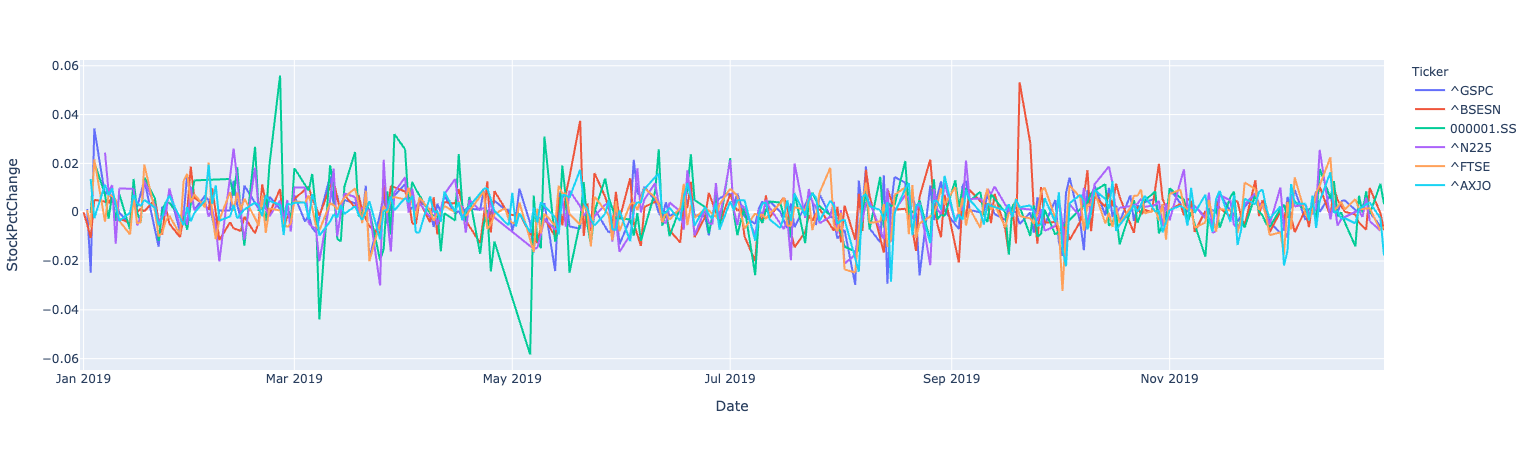

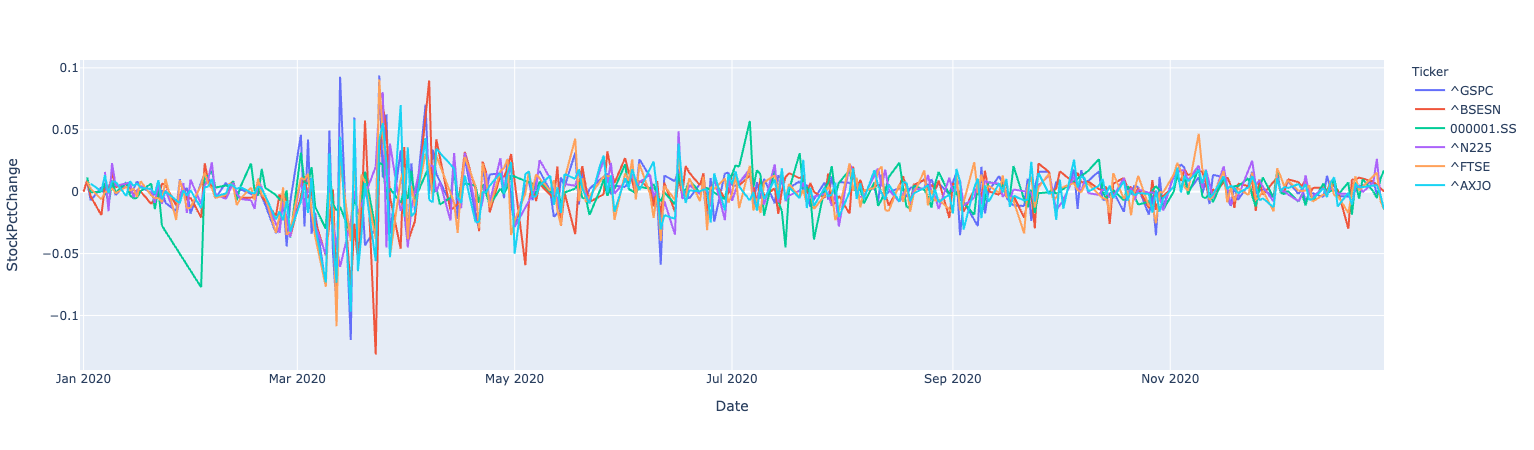

In [106]:
dfStock_2019 = getStockDf(2019)
dfStock_2020 = getStockDf(2020)


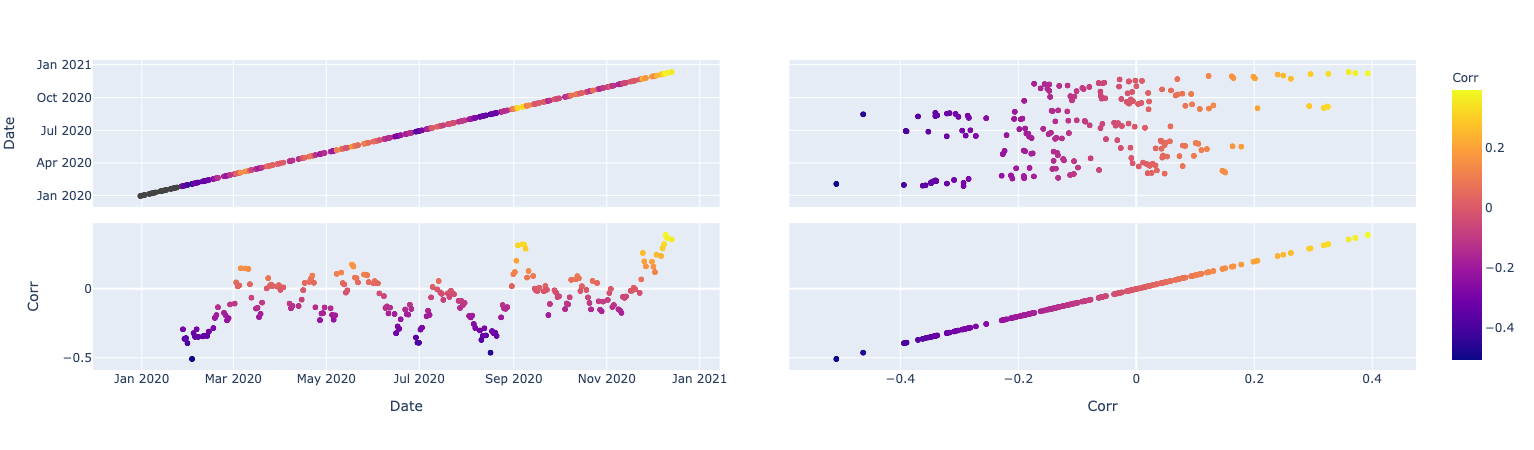

In [107]:
corr_graph_maker(dfStock_2019, climate_df_2019)
corr_graph_maker(dfStock_2020, climate_df_2020)

In [242]:
#dataframes for dashboard
country_dict = {'IN' : '^BSESN',
                'CN' : '000001.SS',
                'JP' : '^N225',
                'AU' : '^AXJO',
                'GB' : '^FTSE',
                'US' : '^GSPC'}
#list of air quality factors
aqf = list(air_quality_factors)

#function to generate dict of air quality factors
def full_dict(df_stock, climate_df, country='JP'):
    
    list_of_df = {}
    for factor in aqf:
        polutant_df = climate_df[climate_df['Specie'] == factor]
        polutant_df_country = polutant_df['weighted_median'].groupby('Date').sum()
        new_df  = pd.DataFrame(polutant_df_country)
        pct_chg = factor+"_pct_change"
        new_df[pct_chg] = new_df.pct_change()
        new_df.columns = [factor, pct_chg]
        list_of_df[factor] = new_df
        
    #filter out specific pollutant
#     polutant_df = climate_df[climate_df['Specie'] == polutant]
#     #calculate weighted mean by day
#     polutant_df_country = polutant_df['weighted_median'].groupby('Date').sum()#.pct_change()
    
    df_stock = df_stock[df_stock['Ticker'] == country_dict[country]].set_index('Date')
    df_stock.index = df_stock.index.astype('datetime64[ns]')
    #df_stock = df_stock.index.map(list_of_df)
    for k in list_of_df.keys():
        df_stock = pd.concat([df_stock, list_of_df[k]], axis =1, join="inner")
   
        
    return df_stock.drop(['Open','High','Low','Close','Volume'], axis=1).dropna()

jap_2020 = full_dict(dfStock_2020, japan_climate_2020)
jap_2019 = full_dict(dfStock_2019, japan_climate_2019)

india_2020 = full_dict(dfStock_2020, india_climate_2020, "IN")
india_2019 = full_dict(dfStock_2019, india_climate_2019, "IN")

china_2020 = full_dict(dfStock_2020, china_climate_2020, "CN")
china_2019 = full_dict(dfStock_2019, china_climate_2019, "CN")

aus_2020 = full_dict(dfStock_2020, aus_climate_2020, "AU")
aus_2019 = full_dict(dfStock_2019, aus_climate_2019, "AU")

uk_2020 = full_dict(dfStock_2020, uk_climate_2020, "GB")
uk_2019 = full_dict(dfStock_2019, uk_climate_2019, "GB")

us_2020 = full_dict(dfStock_2020, usa_climate_2020, "US")
us_2019 = full_dict(dfStock_2019, usa_climate_2019, "US")






,Adj Close,Ticker,StockPctChange,pm25,pm25_pct_change,co,co_pct_change,pm10,pm10_pct_change,so2,so2_pct_change,no2,no2_pct_change,o3,o3_pct_change
Date,,,,,,,,,,,,,,,
2019-01-02,2510.030029,^GSPC,0.001268,9.1932,-0.241097,0.68486,0.021051,2.9591,0.017852,0.00893,-0.833333,2.69563,0.760618,4.84824,-0.149221
2019-01-03,2447.889893,^GSPC,-0.024757,11.3335,0.232813,1.10602,0.614958,4.6848,0.583184,0.22073,23.717805,3.43163,0.273035,3.32202,-0.314799
2019-01-04,2531.939941,^GSPC,0.034336,14.0096,0.236123,1.26195,0.140983,5.5839,0.191919,0.22073,0.000000,4.67984,0.363737,2.84912,-0.142353
2019-01-07,2549.689941,^GSPC,0.007010,12.8599,0.436315,0.90956,0.415658,3.3537,0.588001,0.00893,-0.966350,2.45170,0.963449,5.51078,-0.244855
2019-01-08,2574.409912,^GSPC,0.009695,15.8754,0.234489,1.06366,0.169423,4.3505,0.297224,0.00893,0.000000,2.89072,0.179068,5.17752,-0.060474
2019-01-09,2584.959961,^GSPC,0.004098,9.3371,-0.411851,1.17601,0.105626,3.9414,-0.094035,0.00893,0.000000,3.19724,0.106036,5.92416,0.144208
2019-01-10,2596.639893,^GSPC,0.004518,11.3438,0.214917,1.30309,0.108060,4.4024,0.116964,0.00893,0.000000,4.77845,0.494555,4.90346,-0.172294
2019-01-11,2596.260010,^GSPC,-0.000146,16.9088,0.490576,1.48665,0.140865,5.9411,0.349514,0.00893,0.000000,4.80806,0.006197,5.75164,0.172976
2019-01-14,2582.610107,^GSPC,-0.005258,14.2045,0.719278,1.06427,0.493733,3.7025,0.967949,0.00893,0.000000,3.49765,1.631712,5.60331,-0.244242


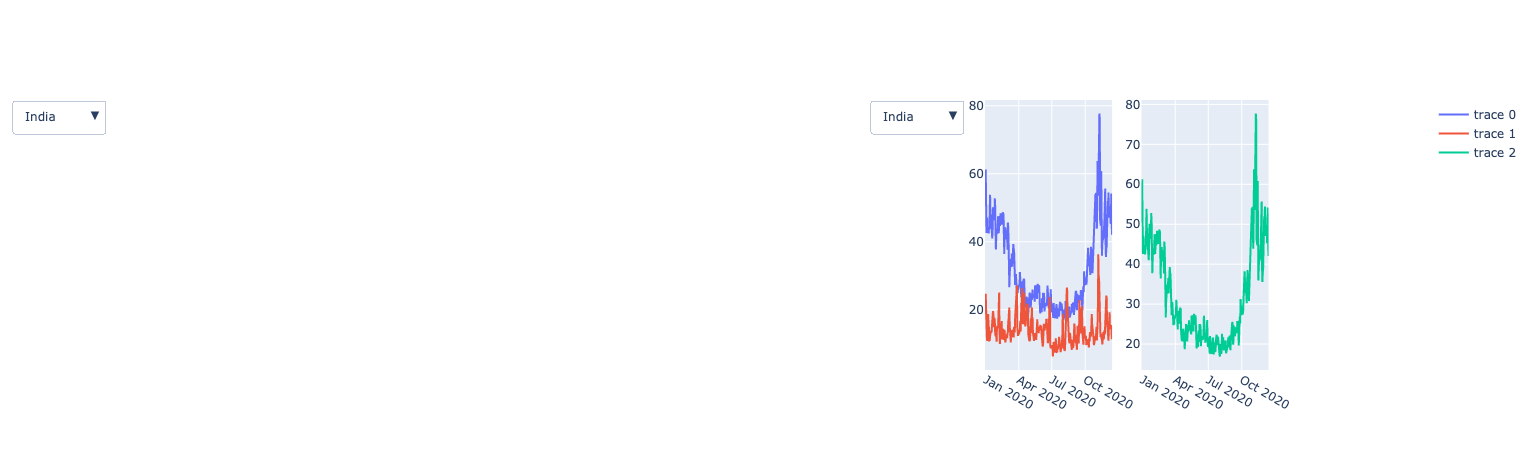

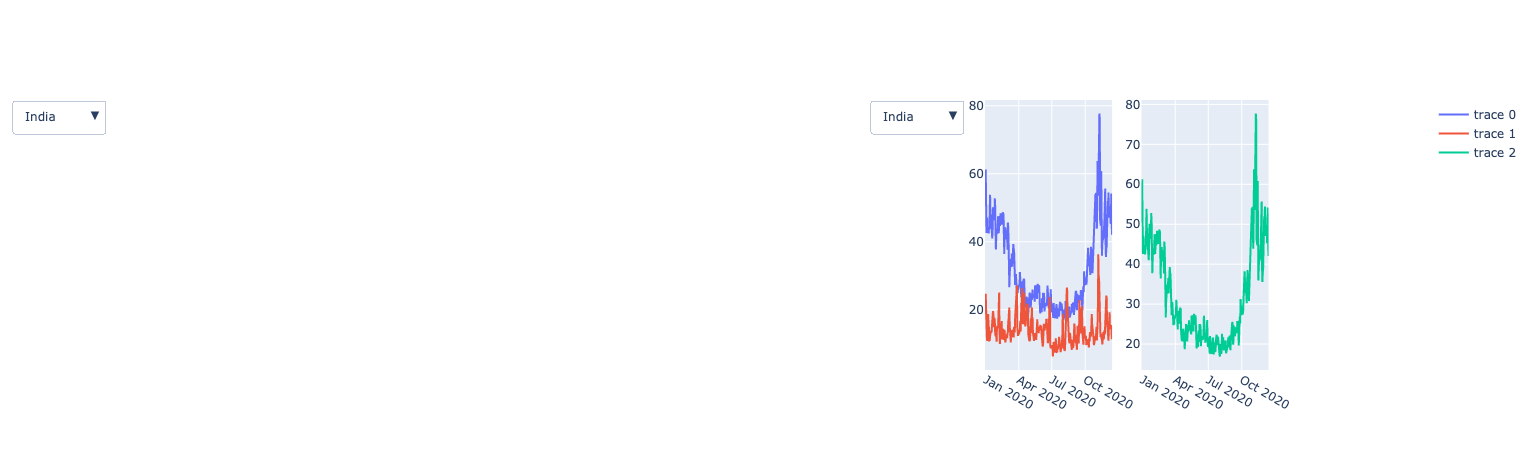

Row
    [0] Str(None)
    [1] Str(None)

In [120]:
import plotly.graph_objects as go
import numpy as np
from plotly.subplots import make_subplots


values_1 = 

fig_2020 = make_subplots(rows=1, cols=3)
# Add one ore more traces
fig_2020.add_trace(go.Scatter(x=values_1.index, y=values_1),row=1, col=1)
fig_2020.add_trace(go.Scatter(x=values_1.index, y=values_3),row=1, col=1)
fig_2020.add_trace(go.Scatter(x=values_1.index, y=values_1),row=1, col=2)
#fig_2020.add_trace(go.Scatter(x=values_1.index, y=values_corr_2020),row=1, col=3)

# TODO: fig_2019
fig_2019 = fig_2020

#fig.add_traces(go.Scatter(x=china.index, y=values_1))
labels = ['India', 'China', 'UK', 'US', 'Australia', 'Japan']
buttons = []
for i, label in enumerate(labels):
    visibility = [i==j for j in range(len(labels))]
    button = dict(
                 label =  label,
                 method = 'update',
                 args = [{'visible': visibility},
                     {'title': label}])
    buttons.append(button)

updatemenus = list([
    dict(active=-1,
         x=-0.15,
         buttons=buttons
    )
])

fig['layout']['title'] = 'Title'
fig['layout']['showlegend'] = False
fig['layout']['updatemenus'] = updatemenus

iplot(fig, filename='dropdown')
# construct menus
updatemenus = [{'buttons': [{'method': 'update',
                             'label': 'India',
                             'args': [{'y': [values_1]},]
                              },
                            {'method': 'update',
                             'label': 'China',
                             'args': [{'y': [values_2, values_1]},]},{'method': 'update',
                             'label': 'UK',
                             'args': [{'y': [values_3]},]},{'method': 'update',
                             'label': 'US',
                             'args': [{'y': [values_4]},]},{'method': 'update',
                             'label': 'Australia',
                             'args': [{'y': [values_5]},]},{'method': 'update',
                             'label': 'Japan',
                             'args': [{'y': [values_6]},]}
                           ],
                'direction': 'down',
                'showactive': True,},{'buttons': [{'method': 'update',
                             'label': 'India',
                             'args': [{'y': [values_1]},]
                              },
                            {'method': 'update',
                             'label': 'China',
                             'args': [{'y': [values_2, values_1]},]},{'method': 'update',
                             'label': 'UK',
                             'args': [{'y': [values_3]},]},{'method': 'update',
                             'label': 'US',
                             'args': [{'y': [values_4]},]},{'method': 'update',
                             'label': 'Australia',
                             'args': [{'y': [values_5]},]},{'method': 'update',
                             'label': 'Japan',
                             'args': [{'y': [values_6]},]}
                           ],
                'direction': 'down',
                'x' : -2,
                'showactive': True,}]

# update layout with buttons, and show the figure
fig_2020.update_layout(updatemenus=updatemenus)


pn.Row(fig_2019.show(),fig_2020.show())

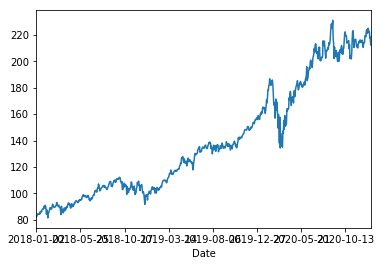

In [14]:
from datetime import date, datetime
start_date = int(datetime(2018, 1, 1, 0, 0).timestamp())
now = int(datetime.now().timestamp())

# yahoo url template (daily data: 2020-07-24 to 2020-11-25)
yahoo_url = 'https://query1.finance.yahoo.com/v7/finance/download/{tix}?period1={s}&period2={e}&interval=1d&events=history'
# get data for 3 tickers and concatenate together
tickers = ['MSFT']
df = pd.DataFrame()
for ticker in tickers:
    url = yahoo_url.format(tix=ticker,s=start_date,e=now)
    df_tmp = pd.read_csv(url)
    df_tmp['Ticker'] = ticker
    df = pd.concat([df, df_tmp])
    

df = df.set_index('Date')
df['Adj Close'].plot()

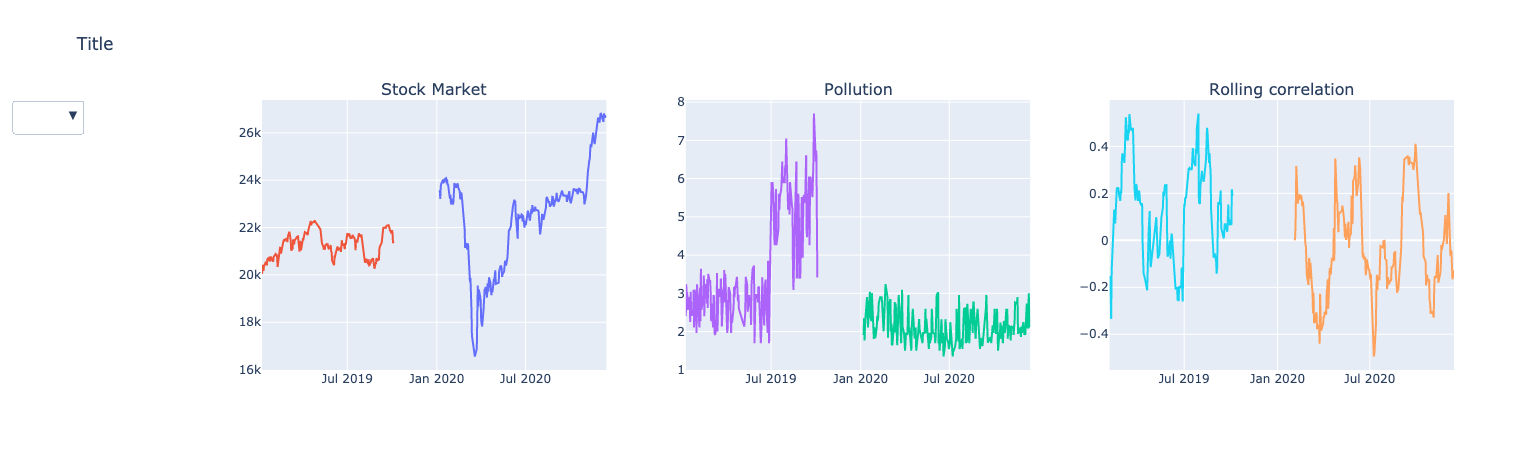

In [356]:
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot
from plotly import tools
init_notebook_mode(connected=True)

x = [i for i in range(100)]
df_1 = jap_2020
df_2 = jap_2019
labels = ["2020", "2019"]

### Create individual figures
# START
fig = make_subplots(rows=1, cols=3, subplot_titles=("Stock Market","Pollution", "Rolling correlation"))

# Add one ore more traces


trace1 = go.Scatter(x=df_1.index, y=df_1['Adj Close'])
trace2 = go.Scatter(x=df_2.index, y=df_2['Adj Close'])

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 1)
trace1 = go.Scatter(x=df_1.index, y=df_1['so2'])
trace2 = go.Scatter(x=df_2.index, y=df_2['so2'])
               
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 1, 2)

df_corr1 = df_1[['StockPctChange', 'so2_pct_change']].rolling(20).corr().dropna()
df_corr1 = df_corr1.groupby(level=[0,0]).last()['StockPctChange'].droplevel(1)
df_corr2 = df_2[['StockPctChange', 'so2_pct_change']].rolling(20).corr().dropna()
df_corr2 = df_corr2.groupby(level=[0,0]).last()['StockPctChange'].droplevel(1)
#print(df_corr1)
trace1 = go.Scatter(x=df_corr1.index, y=df_corr1)
trace2 = go.Scatter(x=df_corr2.index, y=df_corr2)
             
fig.append_trace(trace1, 1, 3)
fig.append_trace(trace2, 1, 3)

# END

### Create buttons for drop down menu
buttons = []
for i, label in enumerate(labels):
    visibility = [i==j for j in range(len(labels))]
    button = dict(
                 label =  label,
                 method = 'update',
                 args = [{'visible': visibility},
                     {'title': label}])
    buttons.append(button)

updatemenus = list([
    dict(active=-1,
         x=-0.15,
         buttons=buttons
    )
])

fig['layout']['title'] = 'Title'
fig['layout']['showlegend'] = False
fig['layout']['updatemenus'] = updatemenus

iplot(fig, filename='dropdown')


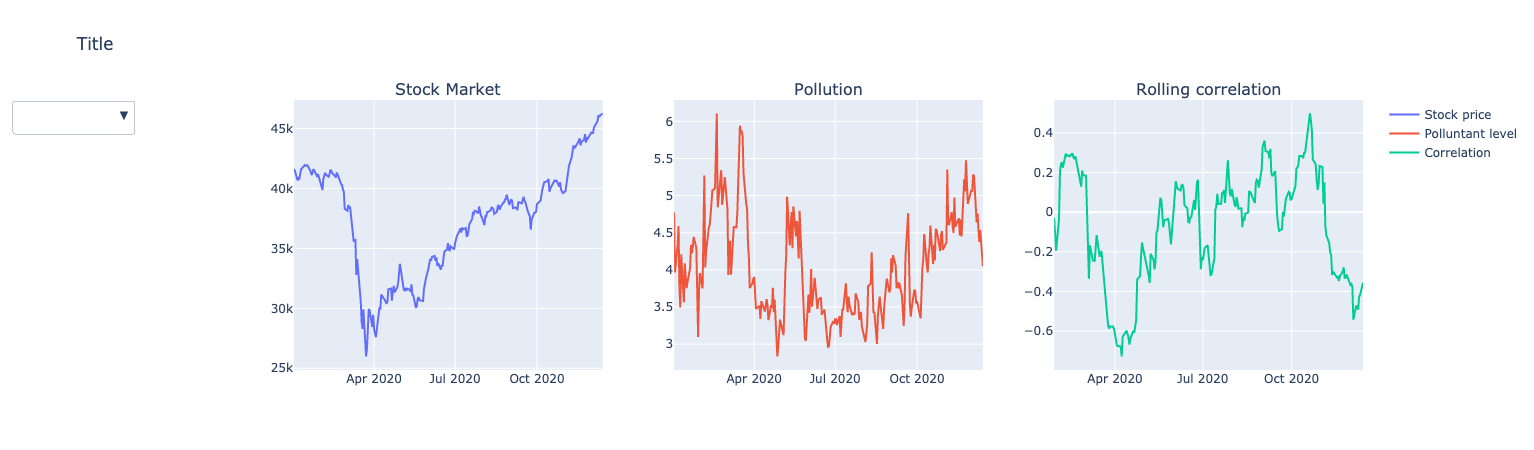

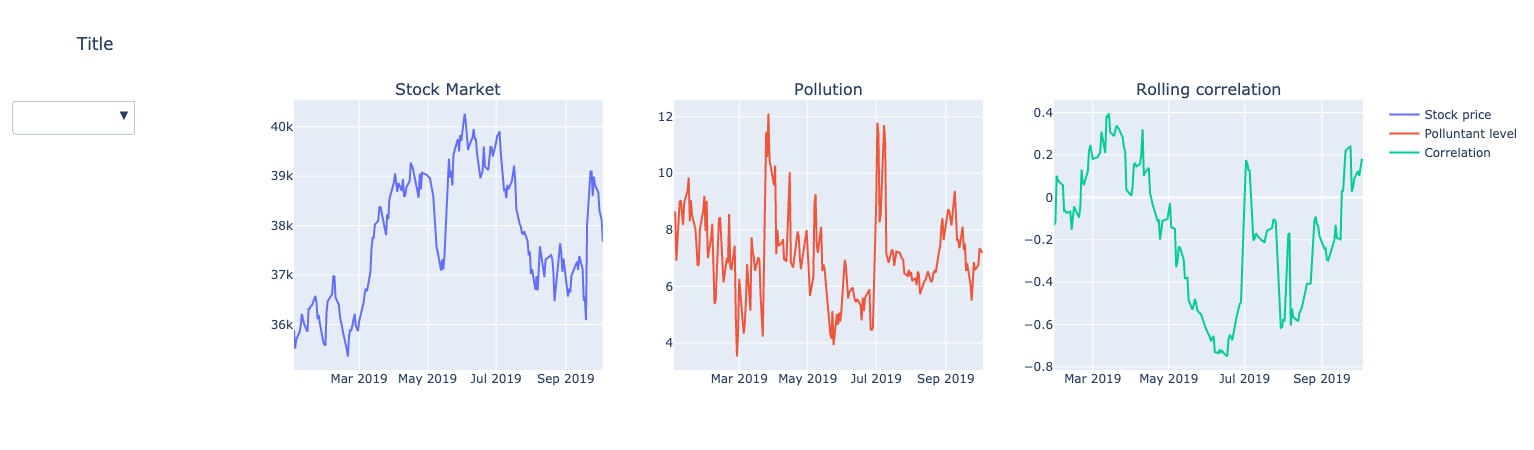

In [397]:
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot
from plotly import tools
init_notebook_mode(connected=True)

x = [i for i in range(100)]
#2020 dataframes
df_1 = india_2020
df_2 = china_2020
df_3 = uk_2020
df_4 = us_2020
df_5 = aus_2020
df_6 = jap_2020
labels = ["India", "China", 'UK', 'United States', 'Australia', 'Japan' ]

#2019 dataframes
df_1a = india_2019
df_2a = china_2019
df_3a = uk_2019
df_4a = us_2019
df_5a = aus_2019
df_6a = jap_2019


### Create individual figures
# START OF 2020 figure
fig = make_subplots(rows=1, cols=3, subplot_titles=("Stock Market","Pollution", "Rolling correlation"))

# Add one ore more traces


trace1 = go.Scatter(x=df_1.index, y=df_1['Adj Close'], name='Stock price')
trace2 = go.Scatter(x=df_2.index, y=df_2['Adj Close'], name='Stock price', visible=False)
trace3 = go.Scatter(x=df_3.index, y=df_3['Adj Close'], name='Stock price', visible=False)
trace4 = go.Scatter(x=df_4.index, y=df_4['Adj Close'], name='Stock price', visible=False)
trace5 = go.Scatter(x=df_5.index, y=df_5['Adj Close'], name='Stock price', visible=False)
trace6 = go.Scatter(x=df_6.index, y=df_6['Adj Close'], name='Stock price', visible=False)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 1)
fig.append_trace(trace3, 1, 1)
fig.append_trace(trace4, 1, 1)
fig.append_trace(trace5, 1, 1)
fig.append_trace(trace6, 1, 1)

trace1 = go.Scatter(x=df_1.index, y=df_1['so2'], name = 'Polluntant level')
trace2 = go.Scatter(x=df_2.index, y=df_2['so2'], name = 'Polluntant level', visible = False)
trace3 = go.Scatter(x=df_3.index, y=df_3['so2'], name = 'Polluntant level', visible = False)
trace4 = go.Scatter(x=df_4.index, y=df_1['so2'], name = 'Polluntant level', visible = False)
trace5 = go.Scatter(x=df_5.index, y=df_2['so2'], name = 'Polluntant level', visible = False)
trace6 = go.Scatter(x=df_6.index, y=df_3['so2'], name = 'Polluntant level', visible = False)
               
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 2)
fig.append_trace(trace4, 1, 2)
fig.append_trace(trace5, 1, 2)
fig.append_trace(trace6, 1, 2)


df_corr1 = df_1[['StockPctChange', 'so2_pct_change']].rolling(20).corr().dropna()
df_corr1 = df_corr1.groupby(level=[0,0]).last()['StockPctChange'].droplevel(1)
df_corr2 = df_2[['StockPctChange', 'so2_pct_change']].rolling(20).corr().dropna()
df_corr2 = df_corr2.groupby(level=[0,0]).last()['StockPctChange'].droplevel(1)
df_corr3 = df_3[['StockPctChange', 'so2_pct_change']].rolling(20).corr().dropna()
df_corr3 = df_corr3.groupby(level=[0,0]).last()['StockPctChange'].droplevel(1)
df_corr4 = df_4[['StockPctChange', 'so2_pct_change']].rolling(20).corr().dropna()
df_corr4 = df_corr4.groupby(level=[0,0]).last()['StockPctChange'].droplevel(1)
df_corr5 = df_5[['StockPctChange', 'so2_pct_change']].rolling(20).corr().dropna()
df_corr5 = df_corr5.groupby(level=[0,0]).last()['StockPctChange'].droplevel(1)
df_corr6 = df_6[['StockPctChange', 'so2_pct_change']].rolling(20).corr().dropna()
df_corr6 = df_corr6.groupby(level=[0,0]).last()['StockPctChange'].droplevel(1)



#print(df_corr1)
trace1 = go.Scatter(x=df_corr1.index, y=df_corr1, name='Correlation')
trace2 = go.Scatter(x=df_corr2.index, y=df_corr2, name='Correlation', visible=False)
trace3 = go.Scatter(x=df_corr3.index, y=df_corr3, name='Correlation', visible=False)
trace4 = go.Scatter(x=df_corr4.index, y=df_corr1, name='Correlation', visible=False)
trace5 = go.Scatter(x=df_corr5.index, y=df_corr2, name='Correlation', visible=False)
trace6 = go.Scatter(x=df_corr6.index, y=df_corr3, name='Correlation', visible=False)
             

fig.append_trace(trace1, 1, 3)
fig.append_trace(trace2, 1, 3)
fig.append_trace(trace3, 1, 3)
fig.append_trace(trace4, 1, 3)
fig.append_trace(trace5, 1, 3)
fig.append_trace(trace6, 1, 3)

# END

buttons = []
for i, label in enumerate(labels):
    visibility = [i==j for j in range(len(labels))]
    button = dict(
                 label =  label,
                 method = 'update',
                 args = [{'visible': visibility},
                     {'title': label}])
    buttons.append(button)

updatemenus = list([
    dict(active=-1,
         x=-0.15,
         buttons=buttons
    )
])

fig['layout']['title'] = 'Title'
fig['layout']['showlegend'] = True
fig['layout']['updatemenus'] = updatemenus

iplot(fig, filename='dropdown')


# START OF 2019 FIGURE
fig = make_subplots(rows=1, cols=3, subplot_titles=("Stock Market","Pollution", "Rolling correlation"))

# Add one ore more traces


trace1 = go.Scatter(x=df_1a.index, y=df_1a['Adj Close'], name='Stock price')
trace2 = go.Scatter(x=df_2a.index, y=df_2a['Adj Close'], name='Stock price', visible=False)
trace3 = go.Scatter(x=df_3a.index, y=df_3a['Adj Close'], name='Stock price', visible=False)
trace4 = go.Scatter(x=df_4a.index, y=df_4a['Adj Close'], name='Stock price', visible=False)
trace5 = go.Scatter(x=df_5a.index, y=df_5a['Adj Close'], name='Stock price', visible=False)
trace6 = go.Scatter(x=df_6a.index, y=df_6a['Adj Close'], name='Stock price', visible=False)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 1)
fig.append_trace(trace3, 1, 1)
fig.append_trace(trace4, 1, 1)
fig.append_trace(trace5, 1, 1)
fig.append_trace(trace6, 1, 1)

trace1 = go.Scatter(x=df_1a.index, y=df_1a['so2'], name = 'Polluntant level')
trace2 = go.Scatter(x=df_2a.index, y=df_2a['so2'], name = 'Polluntant level', visible = False)
trace3 = go.Scatter(x=df_3a.index, y=df_3a['so2'], name = 'Polluntant level', visible = False)
trace4 = go.Scatter(x=df_4a.index, y=df_1a['so2'], name = 'Polluntant level', visible = False)
trace5 = go.Scatter(x=df_5a.index, y=df_2a['so2'], name = 'Polluntant level', visible = False)
trace6 = go.Scatter(x=df_6a.index, y=df_3a['so2'], name = 'Polluntant level', visible = False)
               
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 2)
fig.append_trace(trace4, 1, 2)
fig.append_trace(trace5, 1, 2)
fig.append_trace(trace6, 1, 2)


df_corr1 = df_1a[['StockPctChange', 'so2_pct_change']].rolling(20).corr().dropna()
df_corr1 = df_corr1.groupby(level=[0,0]).last()['StockPctChange'].droplevel(1)
df_corr2 = df_2a[['StockPctChange', 'so2_pct_change']].rolling(20).corr().dropna()
df_corr2 = df_corr2.groupby(level=[0,0]).last()['StockPctChange'].droplevel(1)
df_corr3 = df_3a[['StockPctChange', 'so2_pct_change']].rolling(20).corr().dropna()
df_corr3 = df_corr3.groupby(level=[0,0]).last()['StockPctChange'].droplevel(1)
df_corr4 = df_4a[['StockPctChange', 'so2_pct_change']].rolling(20).corr().dropna()
df_corr4 = df_corr4.groupby(level=[0,0]).last()['StockPctChange'].droplevel(1)
df_corr5 = df_5a[['StockPctChange', 'so2_pct_change']].rolling(20).corr().dropna()
df_corr5 = df_corr5.groupby(level=[0,0]).last()['StockPctChange'].droplevel(1)
df_corr6 = df_6a[['StockPctChange', 'so2_pct_change']].rolling(20).corr().dropna()
df_corr6 = df_corr6.groupby(level=[0,0]).last()['StockPctChange'].droplevel(1)



#print(df_corr1)
trace1 = go.Scatter(x=df_corr1.index, y=df_corr1, name='Correlation')
#slider_correlation(df_1, fig)
trace2 = go.Scatter(x=df_corr2.index, y=df_corr2, name='Correlation', visible=False)
trace3 = go.Scatter(x=df_corr3.index, y=df_corr3, name='Correlation', visible=False)
trace4 = go.Scatter(x=df_corr4.index, y=df_corr1, name='Correlation', visible=False)
trace5 = go.Scatter(x=df_corr5.index, y=df_corr2, name='Correlation', visible=False)
trace6 = go.Scatter(x=df_corr6.index, y=df_corr3, name='Correlation', visible=False)
             

fig.append_trace(trace1, 1, 3)
fig.append_trace(trace2, 1, 3)
fig.append_trace(trace3, 1, 3)
fig.append_trace(trace4, 1, 3)
fig.append_trace(trace5, 1, 3)
fig.append_trace(trace6, 1, 3)

# END

### Create buttons for drop down menu
buttons = []
for i, label in enumerate(labels):
    visibility = [i==j for j in range(len(labels))]
    button = dict(
                 label =  label,
                 method = 'update',
                 args = [{'visible': visibility},
                     {'title': label}])
    buttons.append(button)

updatemenus = list([
    dict(active=-1,
         x=-0.15,
         buttons=buttons
    )
])

fig['layout']['title'] = 'Title'
fig['layout']['showlegend'] = True
fig['layout']['updatemenus'] = updatemenus

iplot(fig, filename='dropdown')


In [395]:
import numpy as np

# Create figure
fig = go.Figure()

def slider_correlation(df_1, fig):
# Add traces, one for each slider step
    for step in np.arange(2, 30, 1):
        df_corr1 = df_1[['StockPctChange', 'so2_pct_change']].rolling(step).corr().dropna()
        df_corr1 = df_corr1.groupby(level=[0,0]).last()['StockPctChange'].droplevel(1)
        
        trace = (go.Scatter(x=df_corr1.index, y=df_corr1,visible=False,
                line=dict(color="#00CED1", width=2),
                name="𝜈 = " + str(step)))
        fig.append_trace(trace, 1, 3)
    # Make 10th trace visible
    fig.data[4].visible = True

    # Create and add slider
    steps = []
    for i in range(len(fig.data)):
        step = dict(
            method="update",
            args=[{"visible": [False] * len(fig.data)},
                  ],  # layout attribute
        )
        step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
        steps.append(step)

    sliders = [dict(
        active=4,
        currentvalue={"prefix": "Rolling period days: "},
        pad={"t": 50},
        steps=steps
    )]

    fig.update_layout(
        sliders=sliders
    )

# slider_correlation(df_1, fig)   
# fig.show()